In [6]:
import tensorflow as tf
# NumPy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

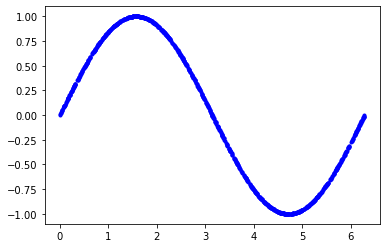

In [7]:
# We'll generate this many sample datapoints
SAMPLES = 1000

# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

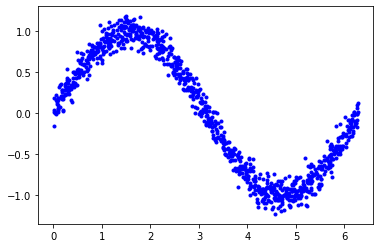

In [8]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

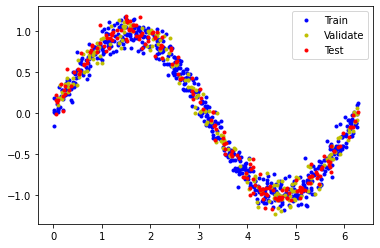

In [9]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

In [12]:
# We'll use Keras to create a simple model architecture
from keras import layers
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print a summary of the model's architecture
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


2022-04-18 11:53:19.182532: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-18 11:53:19.182595: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (patrick-XPS-15-9560): /proc/driver/nvidia/version does not exist
2022-04-18 11:53:19.183562: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
                     validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 1s 5ms/step - loss: 0.7994 - mae: 0.7884 - val_loss: 0.5914 - val_mae: 0.6926
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4854 - mae: 0.6188 - val_loss: 0.4723 - val_mae: 0.6022
Epoch 3/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4214 - mae: 0.5637 - val_loss: 0.4276 - val_mae: 0.5725
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3848 - mae: 0.5383 - val_loss: 0.3897 - val_mae: 0.5418
Epoch 5/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3516 - mae: 0.5157 - val_loss: 0.3540 - val_mae: 0.5120
Epoch 6/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3197 - mae: 0.4915 - val_loss: 0.3251 - val_mae: 0.4877
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2932 - mae: 0.4701 - val_loss: 0.3007 - val_mae: 0.4722
Epoch 8/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.

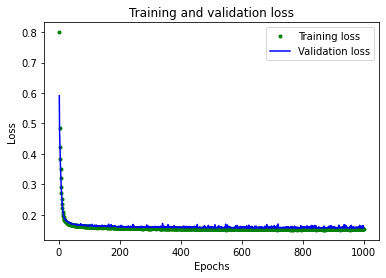

In [14]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

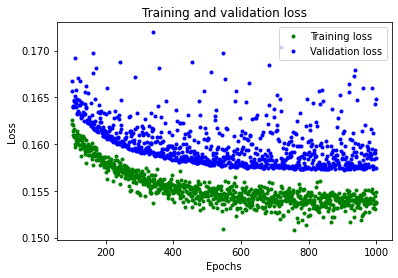

In [15]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

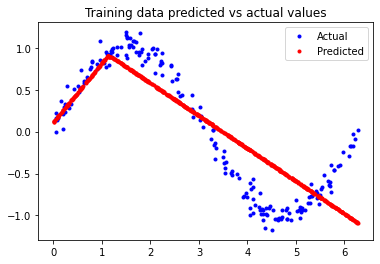

In [16]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)

# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [17]:
model_2 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Show a summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [18]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
                     validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 1s 4ms/step - loss: 0.7137 - mae: 0.7311 - val_loss: 0.4662 - val_mae: 0.6012
Epoch 2/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3890 - mae: 0.5420 - val_loss: 0.3745 - val_mae: 0.5205
Epoch 3/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3183 - mae: 0.4884 - val_loss: 0.3078 - val_mae: 0.4784
Epoch 4/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2622 - mae: 0.4452 - val_loss: 0.2525 - val_mae: 0.4323
Epoch 5/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2180 - mae: 0.4095 - val_loss: 0.2074 - val_mae: 0.3926
Epoch 6/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1853 - mae: 0.3783 - val_loss: 0.1887 - val_mae: 0.3702
Epoch 7/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1667 - mae: 0.3572 - val_loss: 0.1682 - val_mae: 0.3546
Epoch 8/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1532 - m

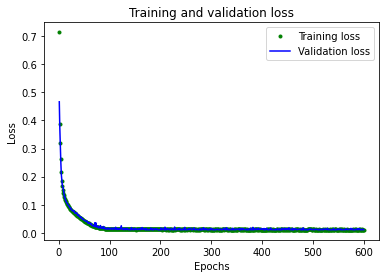

In [19]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

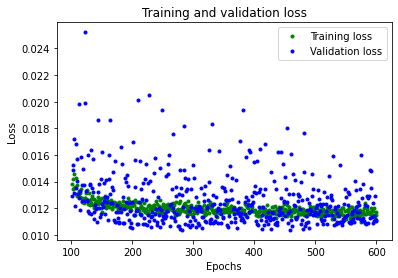

In [20]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 891us/step - loss: 0.0090 - mae: 0.0743


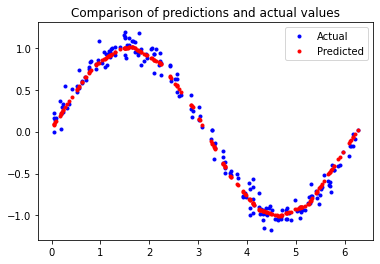

In [21]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)

# Make predictions based on our test dataset
predictions = model_2.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [22]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to disk
open("sine_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in x_test:
    # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()

# Save the model to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)

2022-04-18 12:10:58.441009: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpddrqyai0/assets


2022-04-18 12:10:59.095982: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-04-18 12:10:59.096010: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-04-18 12:10:59.097149: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpddrqyai0
2022-04-18 12:10:59.099324: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-04-18 12:10:59.099365: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmpddrqyai0
2022-04-18 12:10:59.104288: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-04-18 12:10:59.140644: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpddrqyai0
2022-04-18 12:10:59.155208: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 58063 m

INFO:tensorflow:Assets written to: /tmp/tmp_bd2kk9z/assets


INFO:tensorflow:Assets written to: /tmp/tmp_bd2kk9z/assets
/home/patrick/esp/obj_detection/env/lib/python3.8/site-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2022-04-18 12:10:59.937591: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-04-18 12:10:59.937623: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-04-18 12:10:59.937988: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmp_bd2kk9z
2022-04-18 12:10:59.938948: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-04-18 12:10:59.938964: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmp_bd2kk9z
2022-04-18 12:10:59.942811: I tensorflow/cc/saved_

2752

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


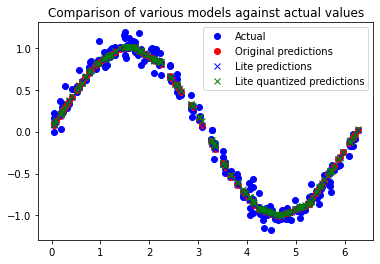

In [23]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = \
  sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
  # Create a 2D tensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
  # Write the value to the input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  # Run inference
  sine_model.invoke()
  # Read the prediction from the output tensor
  sine_model_predictions.append(
      sine_model.get_tensor(sine_model_output_index)[0])
  # Do the same for the quantized model
  sine_model_quantized.set_tensor\
  (sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(
      sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])


# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', \
  label='Lite quantized predictions')
plt.legend()
plt.show()

In [24]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 2932 bytes
Quantized model is 2752 bytes
Difference is 180 bytes


In [26]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
# Print the source file
!cat sine_model_quantized.cc

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
unsigned char sine_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00,
  0x38, 0x01, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00, 0xe0, 0x00, 0x00, 0x00,
  0x58, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x38, 0x05, 0x00, 0x00,
  0x44, 0x04, 0x00, 0x00, 0xe8, 0x01, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x38, 0x01, 0x00, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x60, 0x0a, 0x00, 0x00,
  0x5c, 0x0a, 0x00, 0x00, 0x48, 0x09, 0x00, 0x00, 0x98, 0x08, 0x00, 0x00,
  0x24, 0x07, 0x00, 0x00, 0x80, 0x06, 0x00, 0x00, 0xfc, 0x05, 0x00, 0x00,
  0x94, 0x05, 0x00, 0x00, 0x40, 0x0a